In [1]:
from google.colab import drive
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os 
drive.mount('/content/drive')
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/'
os.chdir(dataPath)
!apt-get install -q tree

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


# Origin Data Porcess

In [ ]:
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/selenium/'
os.chdir(dataPath)

In [ ]:
import pandas as pd
tt = pd.read_csv('data.csv')
d = []
for t in tt['hyperlink']:
  d.append(t[:15])

x_ ,d_ = [],[]
for x in set(d):
  x_.append(x)
  d_.append(d.count(x))

count_url = pd.DataFrame({'url':x_,'count':d_}).sort_values(by=['count'], ascending=False).reset_index()
media = ['cnyes','mirrormedia','chinatimes','ctee','udn',
         'mingpao','twse','ltn','ltn','technews','businesstoday','ettoday']

top11 = pd.DataFrame()
for i in range(len(media)):
  tmp = tt[[t.startswith(count_url['url'][i])for t in tt['hyperlink']]][['hyperlink','name']]
  tmp['media'] = media[i]
  top11 = top11.append(tmp)

top11['type'] = 1
top11 = top11.reset_index()
for i in range(len(top11)):
  if top11['name'][i] == '[]':
    top11['type'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
top11.to_csv('top11.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<BarContainer object of 2 artists>

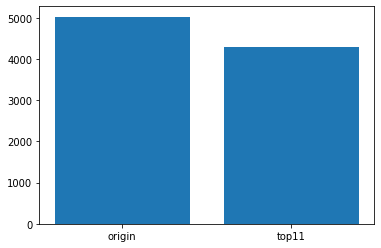

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(['origin','top11'],[len(tt),len(top11)])

# selenium

In [ ]:
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/selenium'
os.chdir(dataPath)
!tree

.
├── data.csv
├── data_selenium.csv
├── top10.csv
└── 資料集說明.docx

0 directories, 4 files


In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 8.9MB/s 
Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [ ]:
import pandas as pd
tt = pd.read_csv('data.csv')

tt = tt[tt['name'] != '[]']

t1=[]
for t in tt['name']:
    t1.append(t.replace("[","").replace("]","").replace("'","").replace(",",""))

In [ ]:
t1[:5]

['周麗真 張志偉 陳逢璿', '王派宏', '王桂霜 李威儀 藍秀琪', '陳鏡如 陳星佑', '朱小蓉']

In [ ]:
from selenium import webdriver
from fnmatch import fnmatch, fnmatchcase
import pandas as pd
from tqdm.notebook import tqdm
import time

news_url,name,media = [],[],[]

#driver = webdriver.Chrome('C:/Program Files (x86)/Google/Chrome/Application/chromedriver.exe')

driver.get('https://www.google.com.tw/?hl=zh-TW')


for n in tqdm(range(len(t1))):
    
    time.sleep(1)

    driver.get('https://www.google.com.tw/?hl=zh-TW')

    driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[1]/div/div[2]/input').send_keys(t1[n])

    time.sleep(1)
    
    try:
        driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[2]/div[2]/div[2]/center/input[1]').click()
        
    except:
        driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[3]/center/input[1]').click()

    userid_element2 = driver.find_elements_by_xpath('//*[@id="rso"]//div/div/div[1]//*[@href]')

    urls=[]
    for i in range(len(userid_element2)):
        urls.append(userid_element2[i].get_attribute('href'))   

    for i in range(len(urls)):

        if fnmatch(str(urls[i]),'https://news.cnyes*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('cnyes')

        if fnmatch(str(urls[i]),'https://www.mirrormedia*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('mirrormedia')

        if fnmatch(str(urls[i]),'https://www.chinatimes.com*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('chinatimes')

        if fnmatch(str(urls[i]),'https://ctee.com*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('ctee')

        if fnmatch(str(urls[i]),'https://udn.com*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('udn')

        if fnmatch(str(urls[i]),'https://www.mingpao.com*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('mingpao')

        if fnmatch(str(urls[i]),'https://www.twse.com*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('twse')

        if fnmatch(str(urls[i]),'https://news.ltn*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('ltn')

        if fnmatch(str(urls[i]),'https://technews.tw/'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('technews')

        if fnmatch(str(urls[i]),'https://www.businesstoday.com.tw/'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('businesstoday')   
               
        if fnmatch(str(urls[i]),'https://www.ettoday*'):
            news_url.append(urls[i])
            name.append(t1[n])
            media.append('ettoday')

In [ ]:
fn = pd.DataFrame({'hyperlink':news_url,
                   'name':name,
                   'media':media})
fn['type'] = 1

In [ ]:
fn.to_csv('selenium.csv')

In [ ]:
data = pd.read_csv('top11.csv')

t1=[]
for t in data['name']:
    t = t.replace("[","").replace("]","").replace("'","").replace(",","")
    t1.append(t)

data['name'] = t1

In [ ]:
all_data = data.append(fn).reset_index()

In [ ]:
all_data = all_data[~all_data['hyperlink'].duplicated(keep=False)]

In [ ]:
all_data.to_csv('data_selenium.csv') #sample don't cover

## selenium Data EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/scrapy'
os.chdir(dataPath)
!tree

.
├── businesstoday.csv
├── chinatimes.csv
├── ctee.csv
├── ettoday.csv
├── ltn.csv
├── mingpao.csv
├── mirrormedia.csv
├── technews.csv
└── udn.csv

0 directories, 9 files


In [ ]:
df = pd.read_csv('../selenium/data_selenium.csv')
top11 = pd.read_csv('../selenium/top11.csv')

Text(0.5, 1.0, 'data_selenium')

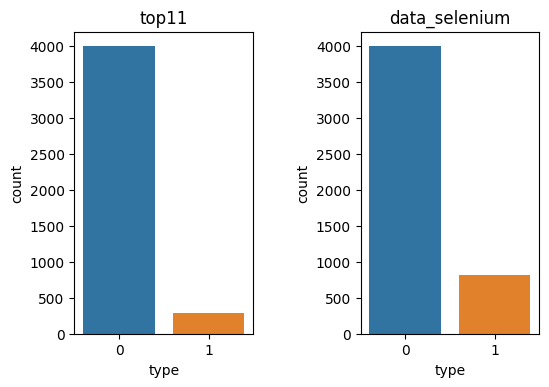

In [ ]:
plt.figure(dpi = 100)
plt.subplots_adjust(wspace =0.6, hspace =0)
plt.subplot(121)
sns.countplot(x="type",data=top11).set_title('top11')
plt.subplot(122)
sns.countplot(x="type",data=df).set_title('data_selenium')

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

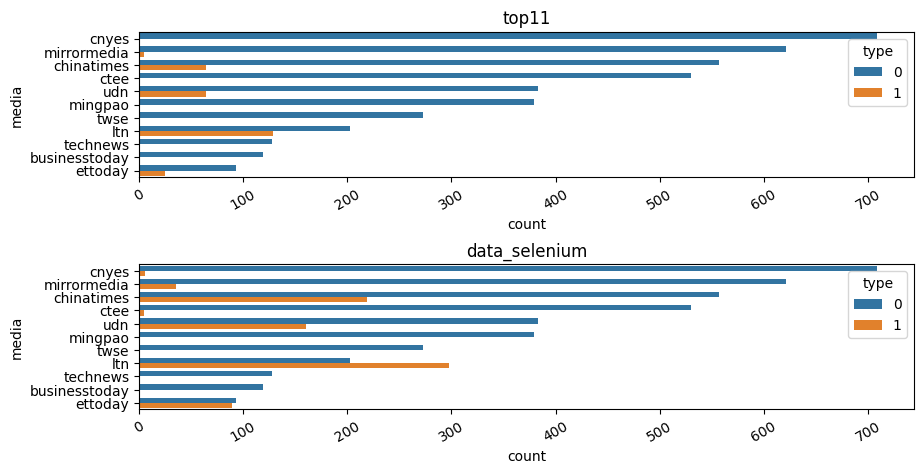

In [ ]:
plt.figure(figsize=(10,5),dpi = 100)
plt.subplots_adjust(wspace =0, hspace =0.6)


plt.subplot(211)
sns.countplot(y="media",hue="type",data=top11).set_title('top11')
plt.xticks(rotation=30) 

plt.subplot(212)
sns.countplot(y="media",hue="type",data=df).set_title('data_selenium')
plt.xticks(rotation=30) 


# Scrapy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/scrapy'
os.chdir(dataPath)
!tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


.
├── businesstoday.csv
├── chinatimes.csv
├── cnyes.csv
├── ctee.csv
├── ettoday.csv
├── ltn.csv
├── mingpao.csv
├── mirrormedia.csv
├── technews.csv
└── udn.csv

0 directories, 10 files


In [ ]:
df = pd.read_csv('../selenium/data_selenium.csv')

In [ ]:
!pip install -q scrapy
import scrapy
import scrapy.crawler as crawler
from multiprocessing import Process, Queue
from twisted.internet import reactor

# 適用於 jupyter notebook 環境，能多次執行撈取作業的方法
def run_spider(spider):
    def f(q):
        try:
            runner = crawler.CrawlerRunner()
            deferred = runner.crawl(spider)
            deferred.addBoth(lambda _: reactor.stop())
            reactor.run()
            q.put(None)
        except Exception as e:
            q.put(e)

    q = Queue()
    p = Process(target=f, args=(q,))
    p.start()
    result = q.get()
    p.join()

    if result is not None:
        raise result

In [ ]:
class cnyes(scrapy.Spider):
    name = "cnyes"

    urls = []
    for url in df[df['media'] == 'cnyes']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'cnyes.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//div[@class="_uo1n"]//h1/text()').extract()

          doc = response.xpath('//*[@class="_82F6"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class mirrormedia(scrapy.Spider):
    name = "mirrormedia"

    urls = []
    for url in df[df['media'] == 'mirrormedia']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'mirrormedia.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//*[@class="article_main"]//h1/text()').extract()

          doc = response.xpath('//*[@class="article_main"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class chinatimes(scrapy.Spider):
    name = "chinatimes"

    urls = []
    for url in df[df['media'] == 'chinatimes']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'chinatimes.csv'        # output file
    }

    
    def parse(self, response):
        #print(response.url)

        title = response.xpath('//h1[@class="article-title"]//text()').extract()

        doc = response.xpath('//div[@class="article-body"]//p/text()').extract()

        yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class ctee(scrapy.Spider):
    name = "ctee"

    urls = []
    for url in df[df['media'] == 'ctee']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'ctee.csv'        # output file
    }

    
    def parse(self, response):
        #print(response.url)

        title = response.xpath('//div[@class="entry-title"]//h1/text()').extract()

        doc = response.xpath('//div[@class="entry-content"]//p/text()').extract()
        
        yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class udn(scrapy.Spider):
    name = "udn"

    urls = []
    for url in df[df['media'] == 'udn']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'udn.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//*[@class="article-content__wrapper"]//h1/text()').extract()

          doc = response.xpath('//*[@class="article-content__wrapper"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class mingpao(scrapy.Spider):
    name = "mingpao"

    urls = []
    for url in df[df['media'] == 'mingpao']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'mingpao.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//div[@class="col span_8_of_12"]//h1//text()').extract()

          doc = response.xpath('//div[@class="col span_8_of_12"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class ltn(scrapy.Spider):
    name = "ltn"

    urls = []
    for url in df[df['media'] == 'ltn']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'ltn.csv'        # output file
    }

    
    def parse(self, response):
        #print(response.url)

        title = response.xpath('//div[@class="whitecon"]//h1/text()').extract()

        doc = response.xpath('//div[@class="text boxTitle boxText"]//p/text()').extract()

        yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class technews(scrapy.Spider):
    name = "technews"

    urls = []
    for url in df[df['media'] == 'technews']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'technews.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//*[@class="site-content"]//h1/a/text()').extract()

          doc = response.xpath('//*[@class="indent"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class businesstoday(scrapy.Spider):
    name = "businesstoday"

    urls = []
    for url in df[df['media'] == 'businesstoday']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'businesstoday.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//*[@class="container"]//h1//text()').extract()

          doc = response.xpath('//*[@class="cke_editable font__select-content"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
class ettoday(scrapy.Spider):
    name = "ettoday"

    urls = []
    for url in df[df['media'] == 'ettoday']['hyperlink']:
      urls.append(url)

  
    start_urls = urls
    custom_settings = {
        'FEED_FORMAT':'csv',              # output format
        'FEED_URI': 'ettoday.csv'        # output file
    }

    
    def parse(self, response):

          title = response.xpath('//*[@class="subject_article"]//h1/text()').extract()

          doc = response.xpath('//*[@class="story"]//p/text()').extract()

          yield {'url': response.url ,'title':title,'doc':doc}

In [ ]:
! rm cnyes.csv
run_spider(cnyes)

! rm mirrormedia.csv
run_spider(mirrormedia)

! rm chinatimes.csv
run_spider(chinatimes)

! rm ctee.csv
run_spider(ctee)

! rm udn.csv
run_spider(udn)

! rm mingpao.csv
run_spider(mingpao)

! rm ltn.csv
run_spider(ltn)

! rm technews.csv
run_spider(technews)

! rm businesstoday.csv
run_spider(businesstoday)

! rm ettoday.csv
run_spider(ettoday)

rm: cannot remove 'cnyes.csv': No such file or directory


/usr/local/lib/python3.6/dist-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)
/usr/local/lib/python3.6/dist-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)
/usr/local/lib/python3.6/dist-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)
/usr/local/lib/python3.6/dist-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in f

## Scrapy Data EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/scrapy'
os.chdir(dataPath)
!tree

.
├── businesstoday.csv
├── chinatimes.csv
├── cnyes.csv
├── ctee.csv
├── ettoday.csv
├── ltn.csv
├── mingpao.csv
├── mirrormedia.csv
├── technews.csv
└── udn.csv

0 directories, 10 files


In [ ]:
import pandas as pd
import glob

all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_scrapy = pd.concat(li, axis=0, ignore_index=True).dropna().reset_index(drop=True)

df_scrapy['text'] = 0
for i in tqdm(range(len(df_scrapy))):
  df_scrapy['text'][i] = df_scrapy['title'][i]+df_scrapy['doc'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
df = pd.read_csv('../selenium/data_selenium.csv')
df = df.rename(columns={"hyperlink": "url"})

In [ ]:
res = pd.merge(df,df_scrapy, on='url')
res.sample(5)
res.to_csv('../bert_classification/csv/data_selenium_scarpy.csv')

In [ ]:
doc_len = []
for i in range(len(res)):
  doc_len.append(len(res['text'][i]))
doc_len.sort()
doc_len = np.array(doc_len)
x = np.arange(len(res))

In [ ]:
len(res[res['name'].isna()]),len(res[~res['name'].isna()])

(3282, 642)

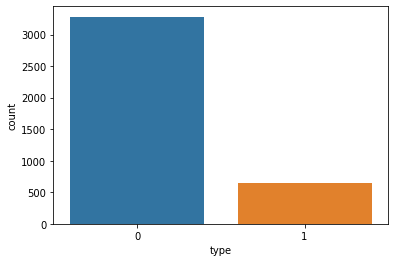

In [ ]:
sns.countplot(x="type", data=res)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

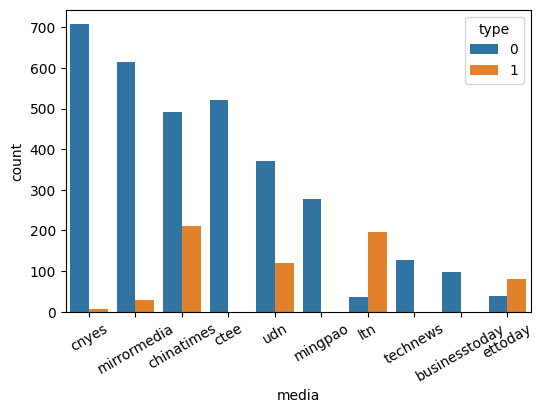

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x="media",hue="type",data=res)
plt.xticks(rotation=30) 

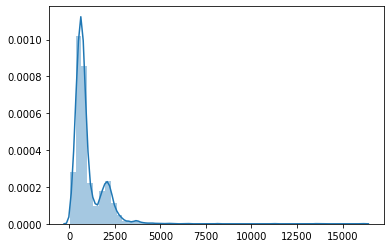

In [ ]:
sns.distplot(doc_len)

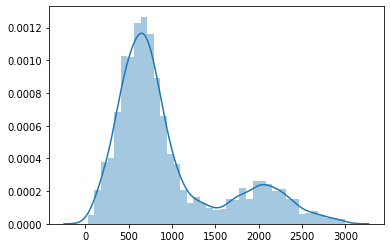

In [ ]:
sns.distplot(doc_len[doc_len< 3000])

# bert_classification

In [3]:
! pip install -q transformers
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/bert_classification/'
os.chdir(dataPath)
!tree

.
├── csv
│   ├── data_selenium_scarpy.csv
│   ├── merge.ipynb
│   ├── res.csv
│   ├── test.csv
│   └── train.csv
├── pkl
│   └── train_bert-base-chinese512.pt_ep1.pkl
├── png
│   └── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep1.pkl.png
├── pt
│   ├── data_selenium_scarpy_bert-base-chinese512.pt
│   ├── test_bert-base-chinese512.pt
│   ├── test_bert-base-multilingual-cased512.pt
│   └── train_bert-base-chinese512.pt
└── test_bert-base-chinese512.ptscore.csv

4 directories, 12 files


In [4]:
import pandas as pd
df = pd.read_csv('csv/data_selenium_scarpy.csv')
len(df)

3924

In [5]:
import random
y=list(range(0,len(df)))
a = random.sample(y, int(len(df)*0.1))
train_data = df.drop(a)
test_data = df.iloc[a,:]
test_data.to_csv('csv/test.csv')
train_data.to_csv('csv/train.csv')
len(train_data),len(test_data)

(3532, 392)

In [6]:
class ez_bert :


  def get_seq(file_name,
              seq1_name,
              seq2_name,
              type_name,
              seq_num,
              seq_lenght,
              pretrained_,
              labels_):
    
    import pandas as pd
    import torch
    from tqdm import tqdm_notebook
    from transformers import BertTokenizerFast
    from torch.utils.data import TensorDataset, random_split
    
    df = pd.read_csv('csv/'+file_name,index_col=0)
    tokenizer = BertTokenizerFast.from_pretrained(pretrained_, do_lower_case=True)
    if seq_num == 1:
      
      sentences = df[seq1_name].values
      labels = df[type_name].values
      sentences = sentences[1:]
      labels = labels[1:]
      input_ids = []
      attention_masks = []
      for sent in tqdm_notebook(sentences):
          encoded_dict = tokenizer.encode_plus(
                              sent,                      # Sentence to encode.
                              add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                              max_length = seq_lenght,           # Pad & truncate all sentences.
                              pad_to_max_length = True,
                              return_attention_mask = True,   # Construct attn. masks.
                              return_tensors = 'pt',     # Return pytorch tensors.
                        )
          input_ids.append(encoded_dict['input_ids'])
          attention_masks.append(encoded_dict['attention_mask'])
    
    else:
    
      sentences_a = df[seq1_name].values
      sentences_b = df[seq2_name].values
      labels = df[type_name].values
      sentences_a = sentences_a[1:]
      sentences_b = sentences_b[1:]
      labels = labels[1:]
      input_ids = []
      attention_masks = []

      for sent_a, sent_b in tqdm_notebook(zip(sentences_a, sentences_b)):
          encoded_dict = tokenizer.encode_plus(
                              sent_a,
                              sent_b,                      # Sentence to encode.
                              add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                              max_length = seq_lenght,           # Pad & truncate all sentences.
                              pad_to_max_length = True,
                              return_attention_mask = True,   # Construct attn. masks.
                              return_tensors = 'pt',     # Return pytorch tensors.
                        )
          input_ids.append(encoded_dict['input_ids'])
          attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    if labels_ == 'yes':
      try:
        labels = torch.tensor(labels.astype('Int32'))
        dataset = TensorDataset(input_ids, attention_masks, labels)
        torch.save(dataset,'pt/'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'.pt')
        print('finished file name :'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'.pt')
      except:
        dataset = TensorDataset(input_ids, attention_masks)
        print('do not get labels')
        torch.save(dataset,'pt/'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'_NL.pt')
        print('finished file name :'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'_NL.pt')
    else:
      dataset = TensorDataset(input_ids, attention_masks)
      torch.save(dataset,'pt/'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'_NL.pt')
      print('finished file name :'+file_name[:-4]+'_'+pretrained_+str(seq_lenght)+'_NL.pt')

  def train(pt_name,pretrained_,num_labels_,batch_size_,epochs_):
    import pandas as pd
    import torch
    from tqdm import tqdm_notebook
    from transformers import BertTokenizerFast
    from torch.utils.data import TensorDataset, random_split
    # Combine the training inputs into a TensorDataset.
    #dataset = TensorDataset(input_ids, attention_masks, labels)
    dataset = torch.load('pt/'+pt_name)

    # Create a 90-10 train-validation split.
    # Calculate the number of samples to include in each set.
    train_size = int(0.75 * len(dataset))
    val_size = len(dataset) - train_size

    # Divide the dataset by randomly selecting samples.
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    print('{:>5,} training samples'.format(train_size))
    print('{:>5,} validation samples'.format(val_size))

    from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

    # size of 16 or 32.
    batch_size = batch_size_

    train_dataloader = DataLoader(
                train_dataset,  
                sampler = RandomSampler(train_dataset), # Select batches randomly
                batch_size = batch_size
            )


    validation_dataloader = DataLoader(
                val_dataset, 
                sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                batch_size = batch_size 
            )

    from transformers import BertForSequenceClassification, AdamW, BertConfig


    model = BertForSequenceClassification.from_pretrained(
        pretrained_, #https://huggingface.co/transformers/pretrained_models.html
        num_labels = num_labels_,   # You can increase this for multi-class tasks.   
        output_attentions = False, # Whether the model returns attentions weights.
        output_hidden_states = False, # Whether the model returns all hidden-states.
    )

    # Tell pytorch to run this model on the GPU.
    model.cuda()

    # Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
    # I believe the 'W' stands for 'Weight Decay fix"
    optimizer = AdamW(model.parameters(),
                      lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                    )

    from transformers import get_linear_schedule_with_warmup

    epochs = epochs_

    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps = 0, # Default value in run_glue.py
                                                num_training_steps = total_steps)

    import numpy as np

    # Function to calculate the accuracy of our predictions vs labels
    def flat_accuracy(preds, labels):
        pred_flat = np.argmax(preds, axis=1).flatten()
        labels_flat = labels.flatten()
        return np.sum(pred_flat == labels_flat) / len(labels_flat)

    import time
    import datetime

    def format_time(elapsed):
        '''
        Takes a time in seconds and returns a string hh:mm:ss
        '''
        # Round to the nearest second.
        elapsed_rounded = int(round((elapsed)))
        
        # Format as hh:mm:ss
        return str(datetime.timedelta(seconds=elapsed_rounded))


    import random
    import numpy as np

    seed_val = 42

    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    training_stats = []

    total_t0 = time.time()

    for epoch_i in range(0, epochs):
        
        
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        
        t0 = time.time()
        total_train_loss = 0
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                
                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device=device, dtype=torch.int64)

            
            model.zero_grad()        

            
            loss, logits = model(b_input_ids, 
                                token_type_ids=None, 
                                attention_mask=b_input_mask, 
                                labels=b_labels)

            
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            
        
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        torch.save(model,'pkl/'+pt_name+'_ep'+str(epoch_i)+'.pkl')
            

        #Validation

        print("")
        print("Running Validation...")

        t0 = time.time()

        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:
            
          
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device=device, dtype=torch.int64)
            
          
            with torch.no_grad():        

                (loss, logits) = model(b_input_ids, 
                                      token_type_ids=None, 
                                      attention_mask=b_input_mask,
                                      labels=b_labels)
                
            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)
            

        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        
        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)
        
        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


  def test (pt_name,pretrained_,model_name):
    from transformers import BertTokenizerFast
    from torch.utils.data import DataLoader
    prediction_dataloader = DataLoader(torch.load('pt/'+pt_name))
    tokenizer = BertTokenizerFast.from_pretrained(pretrained_, do_lower_case=True)
    model = torch.load('pkl/'+model_name)
    from tqdm import tqdm_notebook
    # Put model in evaluation mode
    model.eval()

    # Tracking variables 
    predictions , true_labels = [], []

    # Predict 
    for batch in tqdm_notebook(prediction_dataloader):
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

      logits = outputs[0]

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    print('    DONE.')
    import numpy as np
    pred_labels = []
    for i in range(len(true_labels)):
      
      # The predictions for this batch are a 2-column ndarray (one column for "0" 
      # and one column for "1"). Pick the label with the highest value and turn this
      # in to a list of 0s and 1s.
      pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
      pred_labels.append(pred_labels_i)
    pr=[]
    for t in range(0,len(pred_labels)):
      A=pred_labels[t]
      for i in range(len(A)):
        pr.append(A[i])
    tr=[]
    for t in range(0,len(true_labels)):
      B=true_labels[t]
      for i in range(len(B)):
        tr.append(B[i])

    from sklearn.metrics import confusion_matrix
    confusion_matrix_ = confusion_matrix(tr,pr)

    from sklearn.metrics import recall_score
    recall_score_ = recall_score(tr, pr, average='macro')

    from sklearn.metrics import precision_score
    precision_score_ = precision_score(tr, pr, average='macro')

    from sklearn.metrics import f1_score
    f1_score_ = f1_score(tr, pr, average='macro')
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    if confusion_matrix_.max() < 10000 :
      #numberic
      plt.figure(figsize = (15,7))
      plt.rcParams.update({'font.size': 15})
      plot = sns.heatmap(confusion_matrix_,cmap=plt.cm.Blues, annot=True,fmt='g')
    else :
      #科學記號
      plt.figure(figsize = (20,7))
      plot = sns.heatmap(confusion_matrix_,cmap=plt.cm.Blues, annot=True)
    plot.set_title('f1:'+str(round(f1_score_*100,2))+'  recall:'+str(round(recall_score_*100,2))+'  precision:'+str(round(precision_score_*100,2)))
    plot.set(xlabel='predicted', ylabel='actual')
    plot.figure.savefig('png/'+pt_name+model_name+'.png', bbox_inches='tight')

    import numpy as np
    recall = []
    for t in range(confusion_matrix_.shape[1]):
        tmp = 0
        for i in range(confusion_matrix_.shape[0]):
            tmp = tmp + confusion_matrix_[i,t]
        recall.append(confusion_matrix_[t,t]/tmp)
    
    precision = []
    for t in range(confusion_matrix_.shape[1]):
        tmp = 0
        for i in range(confusion_matrix_.shape[0]):
            tmp = tmp + confusion_matrix_[t,i]
        precision.append(confusion_matrix_[t,t]/tmp)

    f1=[]
    for i in range(len(precision)):
       f1.append(round(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]), 2))

   

    import pandas as pd
    score_frame = pd.DataFrame()
    score_frame['recall'] = recall
    score_frame['precision'] = precision
    score_frame['f1'] = f1

    score_frame.to_csv(pt_name+'score.csv')

  def predict (pt_name,pretrained_,model_name):
    from transformers import BertTokenizerFast
    from torch.utils.data import DataLoader
    prediction_dataloader = DataLoader(torch.load('pt/'+pt_name))
    tokenizer = BertTokenizerFast.from_pretrained(pretrained_, do_lower_case=True)
    model = torch.load('pkl/'+model_name)
    from tqdm import tqdm_notebook
    # Put model in evaluation mode
    model.eval()

    # Tracking variables 
    predictions  = []

    # Predict 
    for batch in tqdm_notebook(prediction_dataloader):
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask = batch
      
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

      logits = outputs[0]

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      # Store predictions and true labels
      predictions.append(logits)
    print('    DONE.')
    import numpy as np
    pred_labels = []
    for i in range(len(predictions)):
      
      # The predictions for this batch are a 2-column ndarray (one column for "0" 
      # and one column for "1"). Pick the label with the highest value and turn this
      # in to a list of 0s and 1s.
      pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
      pred_labels.append(pred_labels_i[0])
    print('finshed')
    import pandas as pd
    tp = pd.DataFrame()
    tp['predict'] = pred_labels
    tp.to_csv('csv/'+pt_name[:-3]+'.csv')
    print('save result as csv :'+pt_name[:-3]+'.csv')

  def predict_one (sentences_,seq_lenght,pretrained_,model_name):
    import pandas as pd
    import numpy as np
    import torch
    from tqdm import tqdm_notebook
    from transformers import BertTokenizerFast
    from torch.utils.data import TensorDataset, random_split
    # input_ids = []
    # attention_masks = []
    tokenizer = BertTokenizerFast.from_pretrained(pretrained_, do_lower_case=True)

    encoded_dict = tokenizer.encode_plus(
                        sentences_,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = seq_lenght,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                  )


    b_input_ids = encoded_dict['input_ids']
    b_input_mask = encoded_dict['attention_mask']

    b_input_ids = torch.tensor(b_input_ids , device=device)
    b_input_mask = torch.tensor(b_input_mask , device=device)

    model = torch.load('pkl/'+model_name)
    model
    predictions = []
    #b_input_ids, b_input_mask 
    with torch.no_grad():
          # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, 
                      token_type_ids=None,
                      attention_mask=b_input_mask)


      logits = outputs[0]

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      # Store predictions and true labels
      predictions.append(logits)
      pred_labels_i = np.argmax(predictions[0], axis=1).flatten()
    print(
      #predictions[0][0],
      pred_labels_i[0])


In [7]:
!nvidia-smi

Fri Jul  3 14:32:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [9]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [13]:
#-----------get_seq-------------------
import logging

logging.basicConfig(level=logging.ERROR)

from IPython.html.widgets import interact_manual
import warnings
warnings.filterwarnings('ignore')

csv_names   = os.listdir('csv')
pt_names    = os.listdir('pt')
model_names = os.listdir('pkl')

print('-----get_seq---------------')
interact_manual(ez_bert.get_seq, 
                file_name = csv_names,
                seq_num = (1,2),
                seq1_name = 'text',
                seq2_name = 'seq2',
                type_name = 'type',
                seq_lenght ={"64":64,"128":128,"256":256,'512':512},
                pretrained_ = dict(multilingual="bert-base-multilingual-cased", chinese="bert-base-chinese"),
                labels_ = dict(yes="yes", no="no"))
                
print('-----train---------------')
interact_manual(ez_bert.train, 
                pt_name = pt_names,
                num_labels_ = (2,20),
                pretrained_ = dict(multilingual="bert-base-multilingual-cased", chinese="bert-base-chinese"),
                batch_size_ =(2,32),
                epochs_ = (1,10)
                )

print('-----test---------------')
tmp = interact_manual(ez_bert.test, 
                pt_name = pt_names,
                model_name = model_names,
                pretrained_ = dict(multilingual="bert-base-multilingual-cased", chinese="bert-base-chinese"))

print('-----predict---------------')
interact_manual(ez_bert.predict, 
                pt_name = pt_names,
                model_name = model_names,
                pretrained_ = dict(multilingual="bert-base-multilingual-cased", chinese="bert-base-chinese"))

print('-----predict_one---------------')
csv_names   = os.listdir('csv')
pt_names    = os.listdir('pt')
model_names = os.listdir('pkl')
interact_manual(ez_bert.predict_one, 
                seq_lenght ={"64":64,"128":128,"256":256,'512':512},
                sentences_ = 'word',
                model_name = model_names,
                pretrained_ = dict(multilingual="bert-base-multilingual-cased", chinese="bert-base-chinese"))

-----get_seq---------------


interactive(children=(Dropdown(description='file_name', options=('data_selenium_scarpy.csv', 'test.csv', 'trai…

-----train---------------


interactive(children=(Dropdown(description='pt_name', options=('train_bert-base-chinese512.pt', 'test_bert-bas…

-----test---------------


interactive(children=(Dropdown(description='pt_name', options=('train_bert-base-chinese512.pt', 'test_bert-bas…

-----predict---------------


interactive(children=(Dropdown(description='pt_name', options=('train_bert-base-chinese512.pt', 'test_bert-bas…

-----predict_one---------------


interactive(children=(Text(value='word', description='sentences_'), Dropdown(description='seq_lenght', options…

<function __main__.ez_bert.predict_one>

# NER - Data Porcess

In [2]:
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/bert_NER'
os.chdir(dataPath)
!tree

.
├── 622move.png
├── 7525.png
├── albert_base_zh
│   ├── config.json
│   ├── pytorch_model.bin
│   └── vocab.txt
├── data_process.db
├── df3.csv
├── ep1.pkl
├── model
│   ├── bert_ep1.pkl
│   ├── bert_ep1_tag_values.csv
│   ├── bert_ep2.pkl
│   ├── bert_ep2_tag_values.csv
│   ├── bert_ep3.pkl
│   ├── bert_ep3_tag_values.csv
│   ├── bert_ep4.pkl
│   ├── bert_ep4_tag_values.csv
│   ├── bert_ep5.pkl
│   ├── bert_ep5_tag_values.csv
│   ├── model_7525move_ep1.pkl
│   ├── model_7525move_ep1_tag_values.csv
│   ├── model_7525move_ep2.pkl
│   ├── model_7525move_ep2_tag_values.csv
│   ├── model_7525move_ep3.pkl
│   ├── model_7525move_ep3_tag_values.csv
│   ├── model_7525move_ep4.pkl
│   ├── model_7525move_ep4_tag_values.csv
│   ├── model_7525move_ep5.pkl
│   └── model_7525move_ep5_tag_values.csv
├── model_7525move_loss.png
├── model_75_loss.png
├── model_75.png
├── ner_data_process.db
├── reference
│   ├── named_entity_recognition.ipynb
│   ├── ner_dataset.csv
│   └── ref.ipynb
├── train_datalo

In [8]:
df_ = pd.read_csv('../bert_classification/csv/data_selenium_scarpy.csv')

df_['text'] = df_['text'].replace(' ','')

df = pd.DataFrame()

df = df_[['text','name']]

df2 = df[~df['name'].isna()]

df2 = df2.dropna().reset_index()

In [9]:
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1)//500 >0:
    n = len(text1)//500
  else: 
    n = 1
  for w in range(n+1):
    if w == 0:
      l_parcial = text1[:512]
      l_total.append("".join(l_parcial))
    else:
      l_parcial = text1[w*500:w*500 + 512]
      l_total.append("".join(l_parcial))
  return l_total

In [10]:
id,doc,tag = [],[],[]
for i in tqdm((range(len(df2)))):
  id.append([t for t in np.repeat(i,len(get_split(df2['text'][i])))])
  doc.append(get_split(df2['text'][i]))
  tag.append([g for g in np.repeat(df2['name'][i],len(get_split(df2['text'][i])))])

id  = [y for x in id for y in x] 
doc  = [y for x in doc for y in x] 
tag  = [y for x in tag for y in x] 

df2_ = pd.DataFrame()
df2_['id'] = id
df2_['doc'] = doc
df2_['name'] = tag


for i in range(len(df2_)): 
  df2_['name'][i] = str(df2_['name'][i]).split()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
Sentence_tmp = []

for i in tqdm(range(len(df2_))):
  Sentence_tmp.extend(np.repeat(i,len(df2_['doc'][i])))
Word_tmp = []

for i in tqdm(range(len(df2_))):
  for j in range(len(df2_['doc'][i])):
    Word_tmp.extend(df2_['doc'][i][j])

In [12]:
import re

res = []

for j in range(len(df2_['doc'])):

  l = np.repeat('O',len(df2_['doc'][j]))
  for n in range(len(df2_['name'][j])):
    
    a = [(m.start(0), m.end(0)) for m in re.finditer(df2_['name'][j][n], string = df2_['doc'][j])]

    for i in range(len(a)):
      l[a[i][0]]='B'
      l[a[i][0]+1:a[i][1]] = 'I'
  res.extend(l)

df3 = pd.DataFrame()
df3['Sentence'] = Sentence_tmp
df3['Word'] = Word_tmp
df3['Tag'] = res

In [13]:
Sentence,Tag = [],[]
for i in tqdm(range(len(df3['Sentence'].unique()))):
  Sentence.append(df3[df3['Sentence'] == i]['Word'])
  Tag.append(df3[df3['Sentence'] == i]['Tag'])

In [14]:
import dill
dill.dump_session('ner_data_process.db')

# AutoModel_NER

In [7]:
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/bert_NER'
os.chdir(dataPath)

In [8]:

!nvidia-smi

Fri Jul  3 15:25:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    43W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [10]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [11]:
#!ls albert_base_zh

In [12]:
#tokenizer = AutoTokenizer.from_pretrained("albert_base_zh/")

In [13]:
# config = AutoConfig.from_pretrained(
#         "bert-base-chinese",num_labels = 4)
# model = AutoModelForTokenClassification.from_pretrained(
#         "bert-base-chinese",config=config)

# config = AutoConfig.from_pretrained(
#         "albert_base_zh/",num_labels = 4)
# model = AutoModelForTokenClassification.from_pretrained(
#         "albert_base_zh/",config=config)


In [14]:
!pip install -q transformers
import transformers
transformers.__version__
from transformers import (
    AutoConfig,
    AutoModelForTokenClassification,
    AutoTokenizer,
    AdamW)

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese", do_lower_case=False)


## Get pt

>










In [23]:
import dill
dill.load_session('ner_data_process.db')

In [24]:
MAX_LEN = 512
bs = 8

In [25]:
from keras.preprocessing.sequence import pad_sequences

tag_values = ['O', 'B', 'I', 'PAD']
tag2idx = {t: i for i, t in enumerate(tag_values)}

input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in Sentence],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in Tag],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

Using TensorFlow backend.


In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__
transformers.__version__

'3.0.0'

In [42]:
Do_test = 'y'

if Do_test == 'y':
  # x_train(0.6) ,x_val(0.2), x_test(0.2)
  x, val_inputs, y, val_tags = train_test_split(input_ids,tags,test_size=0.2,train_size=0.8)
  tr_inputs, cv_inputs, tr_tags, cv_tags = train_test_split(x,y,test_size = 0.25,train_size =0.75)

  x, val_masks, y,  _ = train_test_split(attention_masks,input_ids,test_size=0.2,train_size=0.8)
  tr_masks, cv_masks, _, _ = train_test_split(x,y,test_size = 0.25,train_size =0.75)

else:
  #x_train(0.75) ,x_val(0.25)
  tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids,tags,random_state=2020, test_size=0.25)

  tr_masks, val_masks, _, _ = train_test_split(attention_masks,input_ids,random_state=2020, test_size=0.25)

In [43]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)


tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)


tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)


train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

if Do_test == 'y':
  test_inputs = torch.tensor(cv_inputs)
  cv_tags = torch.tensor(cv_tags)
  cv_masks = torch.tensor(cv_masks)
  test_data = TensorDataset(test_inputs, cv_masks, cv_tags)
  test_sampler = RandomSampler(test_data)
  test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=bs)
  torch.save(train_dataloader,'pt/train_dataloader_60.pt')
  torch.save(valid_dataloader,'pt/valid_dataloader_20.pt')
  torch.save(test_dataloader, 'pt/test_dataloader_20.pt')
else:
  torch.save(train_dataloader,'pt/train_dataloader_75.pt')
  torch.save(valid_dataloader,'pt/valid_dataloader_25.pt')

## Train

In [15]:
Do_test = 'y'

In [16]:
tag_values = ['O', 'B', 'I', 'PAD']
if  Do_test == 'y':
  train_dataloader = torch.load('pt/train_dataloader_60.pt')
  valid_dataloader = torch.load('pt/valid_dataloader_20.pt')
  test_dataloader  = torch.load('pt/test_dataloader_20.pt')

else:
  train_dataloader = torch.load('pt/train_dataloader_75.pt')
  valid_dataloader = torch.load('pt/valid_dataloader_25.pt')

In [17]:
config = AutoConfig.from_pretrained(
        "bert-base-chinese",num_labels = 4)
model = AutoModelForTokenClassification.from_pretrained(
        "bert-base-chinese",config=config)


Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-c

In [18]:
model.cuda();

In [19]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
      'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
      'weight_decay_rate': 0.0}
]


optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [20]:
from transformers import get_linear_schedule_with_warmup

epochs = 5
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [21]:
!pip install -q seqeval
from seqeval.metrics import f1_score, precision_score, recall_score, accuracy_score
from tqdm import trange

In [22]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values, test_loss_values = [], [], []
validation_f1_score, validation_precision_score, validation_recall_score = [],[],[]
test_f1_score, test_precision_score, test_recall_score    = [], [],[]


for _ in tqdm(range(epochs)):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(tqdm(train_dataloader)):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, #token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    # ========================================
    #               Validation
    # ========================================
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, #token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                  for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    
    pred_tags = [str(item) for item in pred_tags]
    valid_tags = [str(item) for item in valid_tags]

    validation_f1_score.append(f1_score(pred_tags, valid_tags))
    validation_precision_score.append(precision_score(pred_tags, valid_tags))
    validation_recall_score.append(recall_score(pred_tags, valid_tags))

    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()

    # ========================================
    #               test
    # ========================================
    if Do_test == 'y':
      model.eval()
      # Reset the validation loss for this epoch.
      test_loss =  0
      nb_eval_steps, nb_eval_examples = 0, 0
      predictions , true_labels = [], []
      for batch in test_dataloader:
          batch = tuple(t.to(device) for t in batch)
          b_input_ids, b_input_mask, b_labels = batch

          # Telling the model not to compute or store gradients,
          # saving memory and speeding up validation
          with torch.no_grad():
              # Forward pass, calculate logit predictions.
              # This will return the logits rather than the loss because we have not provided labels.
              outputs = model(b_input_ids, #token_type_ids=None,
                              attention_mask=b_input_mask, labels=b_labels)
          # Move logits and labels to CPU
          logits = outputs[1].detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()

          # Calculate the accuracy for this batch of test sentences.
          test_loss += outputs[0].mean().item()
          predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
          true_labels.extend(label_ids)

      test_loss = test_loss / len(test_dataloader)
      test_loss_values.append(test_loss)
      print("test loss: {}".format(test_loss))
      pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                    for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
      valid_tags = [tag_values[l_i] for l in true_labels
                                    for l_i in l if tag_values[l_i] != "PAD"]
      
      pred_tags = [str(item) for item in pred_tags]
      valid_tags = [str(item) for item in valid_tags]

      test_f1_score.append(f1_score(pred_tags, valid_tags))
      test_precision_score.append(precision_score(pred_tags, valid_tags))
      test_recall_score.append(recall_score(pred_tags, valid_tags))

      print("test Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
      print("test F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
      print()

    torch.save(model,'model/bert622_ep'+str(_+1)+'.pkl')


Average train loss: 0.06039969218997204
Validation loss: 0.01010991296826456
Validation Accuracy: 0.98973394156508
Validation F1-Score: 0.8149398607301118

test loss: 0.013936412675927082
test Accuracy: 0.9853980176286998
test F1-Score: 0.7460415381451779




Average train loss: 0.011749484412324944
Validation loss: 0.007965986825860081
Validation Accuracy: 0.991108476585655
Validation F1-Score: 0.8399828399828401

test loss: 0.013233677499020139
test Accuracy: 0.9868899406660493
test F1-Score: 0.7706153202176643




Average train loss: 0.00597093608554007
Validation loss: 0.010806649200766025
Validation Accuracy: 0.9899401218181662
Validation F1-Score: 0.8183889003934561

test loss: 0.015308893197260868
test Accuracy: 0.9854494632506774
test F1-Score: 0.7532571657646823




Average train loss: 0.0037127313409718197
Validation loss: 0.009367771937738722
Validation Accuracy: 0.9905414808896678
Validation F1-Score: 0.8273260687342834

test loss: 0.01403648736241172
test Accuracy: 0.9861868504990225
test F1-Score: 0.7625431647369489




Average train loss: 0.002258491310040599
Validation loss: 0.009032348980000302
Validation Accuracy: 0.9909108871764474
Validation F1-Score: 0.83010844142037

test loss: 0.013561418328325275
test Accuracy: 0.986812772233083
test F1-Score: 0.7695823810513194




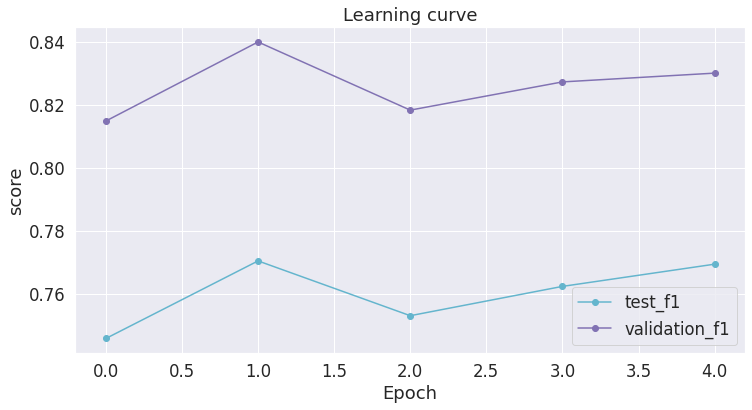

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
if Do_test == 'n':
  plt.plot(validation_f1_score, 'b-o', label="validation_f1")
  plt.plot(validation_precision_score, 'r-o', label="validation_precision")
  plt.plot(validation_recall_score,'g-o',label = "validation_recall")
if Do_test == 'y':
  plt.plot(test_f1_score, 'c-o', label="test_f1")
  plt.plot(validation_f1_score, 'm-o', label="validation_f1")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("score")
plt.legend()
plt.savefig('model_622.png')
plt.show()


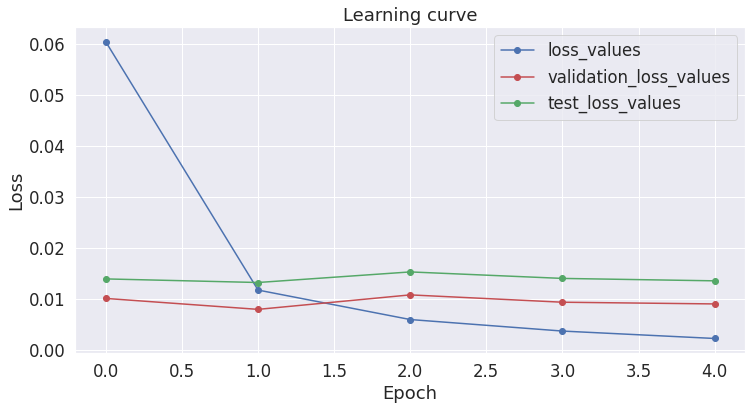

In [25]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
if Do_test == 'n':
  plt.plot(loss_values, 'b-o', label='loss_values')
  plt.plot(validation_loss_values, 'r-o', label="validation_loss_values")
if Do_test == 'y':
  plt.plot(loss_values, 'b-o', label='loss_values')
  plt.plot(validation_loss_values, 'r-o', label="validation_loss_values")
  plt.plot(test_loss_values, 'g-o', label="test_loss_values")
# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('model_622_loss.png')
plt.show()

# prediction

In [ ]:
#人名

In [27]:
dataPath = '/content/drive/My Drive/Colab Notebooks/AI_CUP/'
os.chdir(dataPath)
import warnings
warnings.filterwarnings('ignore')

In [28]:
!tree

.
├── bert_classification
│   ├── csv
│   │   ├── data_selenium_scarpy.csv
│   │   ├── merge.ipynb
│   │   ├── test.csv
│   │   └── train.csv
│   ├── pkl
│   │   ├── train_bert-base-chinese512.pt_ep0.pkl
│   │   ├── train_bert-base-chinese512.pt_ep1.pkl
│   │   ├── train_bert-base-chinese512.pt_ep2.pkl
│   │   ├── train_bert-base-chinese512.pt_ep3.pkl
│   │   └── train_bert-base-chinese512.pt_ep4.pkl
│   ├── png
│   │   ├── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep0.pkl.png
│   │   ├── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep1.pkl.png
│   │   ├── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep2.pkl.png
│   │   ├── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep3.pkl.png
│   │   └── test_bert-base-chinese512.pttrain_bert-base-chinese512.pt_ep4.pkl.png
│   ├── pt
│   │   ├── test_bert-base-chinese512.pt
│   │   └── train_bert-base-chinese512.pt
│   └── test_bert-base-chinese512.ptscore.csv
├── bert_NER
│   ├── albert_base_z

In [36]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

seq_lenght = 512
model_name = 'train_bert-base-chinese512.pt_ep3.pkl'
pretrained_ = "bert-base-chinese"

import logging

logging.basicConfig(level=logging.ERROR)

def predict_one (sentences_,seq_lenght,pretrained_,model_name):
  import pandas as pd
  import numpy as np
  import torch
  from tqdm import tqdm_notebook
  from transformers import BertTokenizerFast
  from torch.utils.data import TensorDataset, random_split
  # input_ids = []
  # attention_masks = []
  tokenizer = BertTokenizerFast.from_pretrained(pretrained_, do_lower_case=True)

  encoded_dict = tokenizer.encode_plus(
                      sentences_,                      # Sentence to encode.
                      add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                      max_length = seq_lenght,           # Pad & truncate all sentences.
                      pad_to_max_length = True,
                      return_attention_mask = True,   # Construct attn. masks.
                      return_tensors = 'pt',     # Return pytorch tensors.
                )


  b_input_ids = encoded_dict['input_ids']
  b_input_mask = encoded_dict['attention_mask']

  b_input_ids = torch.tensor(b_input_ids , device=device)
  b_input_mask = torch.tensor(b_input_mask , device=device)

  model = torch.load('bert_classification/pkl/'+model_name)
  model
  predictions = []
  #b_input_ids, b_input_mask 
  with torch.no_grad():
        # Forward pass, calculate logit predictions
    outputs = model(b_input_ids, 
                    token_type_ids=None,
                    attention_mask=b_input_mask)


    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    # Store predictions and true labels
    predictions.append(logits)
    pred_labels_i = np.argmax(predictions[0], axis=1).flatten()
  return pred_labels_i[0]

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [30]:
!pip install -q transformers

In [58]:
def get_name(test_sentence): 

    from transformers import BertTokenizer, BertConfig
    import pandas as pd
    import numpy as np
    tokenizer = BertTokenizer.from_pretrained("bert-base-chinese", do_lower_case=False)

    #model = torch.load('bert_NER/ep1.pkl')
    model = torch.load('bert_NER/model/bert622_ep2.pkl')

    tag_values = ['O', 'B', 'I', 'PAD']

    tokenized_sentence = tokenizer.encode(test_sentence)
    input_ids = torch.tensor([tokenized_sentence]).cuda()

    with torch.no_grad():
        output = model(input_ids)
    label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

    # join bpe split tokens
    tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
    new_tokens, new_labels = [], []
    for token, label_idx in zip(tokens, label_indices[0]):
        if token.startswith("##"):
            new_tokens[-1] = new_tokens[-1] + token[2:]
        else:
            new_labels.append(tag_values[label_idx])
            new_tokens.append(token)
    

    tt = pd.DataFrame()
    tt['token'] = new_tokens
    tt['label'] = new_labels

    tt.to_csv('result.csv')

    name = []
    for i in range(len(tt)):##########################################
      try:
        if tt['label'][i] == 'B' and tt['label'][i+1] == 'I'and tt['label'][i+2] == 'I':
          name.append(str(list(tt['token'][i:i+3])).replace("'","").replace(",","").replace(" ","").replace("[","").replace("]",""))
        
        if tt['label'][i] == 'B' and tt['label'][i+1] == 'I'and tt['label'][i+2] != 'I':
          name.append(str(list(tt['token'][i:i+2])).replace("'","").replace(",","").replace(" ","").replace("[","").replace("]",""))
      except:
        pass########################################

    
    unique_list = [] 

    for x in name: 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [59]:
def sung(sentences_):
  output = predict_one (sentences_,seq_lenght,pretrained_,model_name)
  if output == 0:
    print("n")
    return []
  else:
    print("y")
    output2 = get_name(sentences_)
  return output2

In [60]:
sentences_ = '''
中國電器公司董事長周麗真（左）被控勾結前總經理張志偉，利用海外子公司掏空中電。（資料照，記者錢利忠攝）,〔
記者謝君臨／台北報導〕生產「東亞」燈具的上市公司中國電器（1611），其董座周麗真、前總經理張志偉涉嫌於99年至101年間，
利用設立於海外的CSL、GLI、SAWTRY等6家子公司，挪用中電共7億元，涉犯《證券交易法》特別背信等罪；台北地檢署調查後，
今起訴周麗真、張志偉，以及海外公司名義負責人陳逢璿等12人。,中電創立於44年，以「東亞照明」品牌稱霸國內傳統照明市場，
其生產的燈具於國內約有30%市占率，去年合併營收28.57億元。,請繼續往下閱讀...,去年4月，中電前任董座顏甘霖透過媒體，
指控外甥周麗真掏空公司30億元資產，周也不甘示弱出面駁斥，指海外投資與虧損均非在她任內，是顏甘霖擔任董事長時造成，
雙方互槓；調查局台北市調處去年6月還因此約談周等11人，訊後請回，經蒐證調查1年多，今年10月28日再發動搜索、約談行動。,
檢調調查，周麗真、張志偉被控於100年11月間，以「投資款」等各種名目掏空中電445萬美元，
將錢轉匯給周、張透過人頭陳逢璿所設立的CLS公司，但中電卻未製作交易傳票，也未在年度財報上揭
'''


In [61]:
sung(sentences_)

y


['周麗真', '張志偉', '陳逢璿', '顏甘霖']

In [62]:
sentences_ ='''
近年來投資市場波動越來越明顯，追求低波動、絕對報酬的量化交易備受注目。
專家表示，採用量化交易策略投資台股，不管是處於多頭或是空頭市場，績效及波動度均可領跑大盤
，甚至比國內投資台股的股票型基金及 ETF 的波動率還低，表現也更為穩定。,大數據時代來臨，
風行歐美 50 年的量化交易儼然成為顯學，台灣亦開始重視此一趨勢發展，也因此，中華機率統計學會及台北科技大學管理學院攜手主辦，
並由元大期貨、摩根亞太量化交易等公司擔任協辦單位，今 (7/5) 日舉辦「時間序列與量化交易研討會」，就目前熱門的量化交易、
智能投資等相關議題進行研討。,越來越多的基金公司重視量化交易，全球規模較大的避險基金多採行量化交易，
包括橋水基金 (Bridgewater Associates)、AQR 資產管理公司、曼氏集團 (Man Group)、文藝復興科技 (Renaissance Technologies)
 等全球知名避險基金。摩根亞太集團董事長張堯勇指出，避險基金規模約為 5 兆,，採取量化交易的基金規模約 1 兆,
，比重佔了 20%，代表量化交易的操作績效好，才會有那麼高的比重。,量化交易的操作績效不亞於價值投資及技術投資，被譽為數學天
'''

In [63]:
sung(sentences_)

n


[]

In [64]:
sentences_='''
傅崐萁被控民國86年間炒作凱聚等股票纏訟超過20年。台灣高等法院更三審去年判2年10月徒刑，經上訴，最高法院今天駁回上訴定讞，

傅崐萁須入獄。最高法院已通知檢方展開防逃。

對於傅崐萁的立委資格是否會被註銷，陳朝建受訪表示，區域立委如因案受褫奪公權宣告，將由立法院函請內政部註銷名籍，

中選會則於判決確定之日起3個月內辦理補選。但此案並未有受褫奪公權的宣告，則尚無補選的問題。

另外，內政部官員指出，由於此案並未宣判褫奪公權，所以傅崐萁的立委資格不受影響，也就是入監時將會維持立委身分，

薪水也照領，服刑完畢後若立委任期尚未結束，可繼續行使立委職權。

前無黨團結聯盟立委顏清標、前國民黨立委邱毅、前民進黨立委高志鵬，也都曾在立委任內遭判刑入獄，但除了高志鵬外，

顏清標和邱毅當時均未被褫奪公權，因此仍具立委資格。（編輯：蘇志宗）
'''

In [65]:
sung(sentences_)

y


['傅UNK萁', '顏清標', '高志鵬']

In [ ]:
#交叉驗證
#模型
#調整參數
#混和模型